### 1. Finite Difference method for solving discrete Laplace Equation

In [32]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import csc_matrix
from scipy.sparse import dia_array
from scipy.sparse import dia_matrix
import scipy.sparse.linalg as splinalg
from numba import njit, prange

In [33]:
N = 3
min, max = -1, 1
dx = (max - min) / N

In [34]:
def generate_D(n):
    ex = np.ones(n)
    data = np.array([-1 * ex, 4 * ex, -1 * ex])
    offsets = np.array([-1, 0, 1])
    
    return dia_matrix((data, offsets), shape=(n, n)).toarray()

In [35]:
@njit(parallel = True)
def kernel(N, A, D, I):
    for i in prange(N):
        for j in prange(N):
            if i == j:
                for ii in prange(N):
                    for jj in prange(N):
                        A[ii+N*i, jj+N*j] = D[ii, jj]
                        
            if np.abs(i - j) == 1:
                for ii in prange(N):
                    for jj in prange(N):
                        A[ii+N*i, jj+N*j] = I[ii, jj]
                        
    return A

In [36]:
def generate_A(N):
    A = np.zeros((N ** 2, N ** 2))
    D = generate_D(N)
    I = -np.identity(N)
    A = kernel(N, A, D, I)
    print(A)
    return A

In [37]:
def generate_b(N, dx):
    b = np.zeros(N ** 2).reshape(N, N)
    b[2, 2] = -1 * np.square(dx)
    return b.reshape(N ** 2)

In [38]:
# solve
def solve(N, dx):
    a = generate_A(N)
    a = csc_matrix(a) # transform to the fitting matrix
    b = generate_b(N, dx)
    x = splinalg.spsolve(a, b).reshape(N, N)
    return x

In [39]:
u = solve(N, dx)
print(u)

[[ 4. -1.  0. -1. -0. -0.  0.  0.  0.]
 [-1.  4. -1. -0. -1. -0.  0.  0.  0.]
 [ 0. -1.  4. -0. -0. -1.  0.  0.  0.]
 [-1. -0. -0.  4. -1.  0. -1. -0. -0.]
 [-0. -1. -0. -1.  4. -1. -0. -1. -0.]
 [-0. -0. -1.  0. -1.  4. -0. -0. -1.]
 [ 0.  0.  0. -1. -0. -0.  4. -1.  0.]
 [ 0.  0.  0. -0. -1. -0. -1.  4. -1.]
 [ 0.  0.  0. -0. -0. -1.  0. -1.  4.]]
[[-0.00595238 -0.01190476 -0.01388889]
 [-0.01190476 -0.02777778 -0.04365079]
 [-0.01388889 -0.04365079 -0.13293651]]


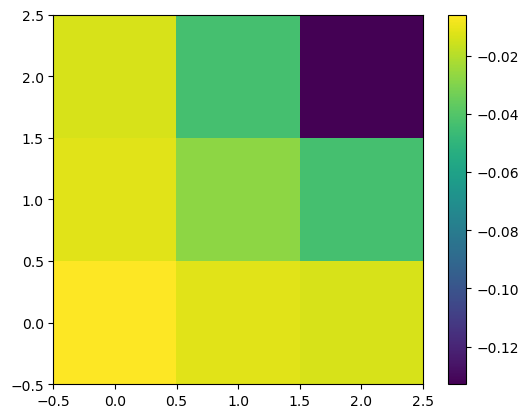

In [43]:
plt.imshow(u, origin = 'lower')
plt.colorbar()